<a href="https://colab.research.google.com/github/MansurPro/walmart_dataset/blob/main/walmart_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import data

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_set_url = "https://raw.githubusercontent.com/MansurPro/walmart_dataset/main/Walmart.csv"
data = pd.read_csv(data_set_url)

In [39]:
# Data review (5 rows)
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [40]:
print('\n\033[1mInference:\033[0m The Datset consists of {} features (columns) & {} samples (rows).'.format(data.shape[1], data.shape[0]))


Inference: The Datset consists of 8 features (columns) & 6435 samples (rows).


In [41]:
#Checking the dtypes of all the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [42]:
#dataset cleaning if there is NaN values
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [43]:
#change the data to datatime
data['Date'] = pd.to_datetime(data['Date'],format="%d-%m-%Y")
#create 3 columns 'month', 'year', 'Week'
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year
data['Week'] = data['Date'].dt.isocalendar().week
#drop Date
data = data.drop('Date', axis = 1)
data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year,Week
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,5
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,6
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,7
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,8
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,9


In [44]:
#Checking the dtypes of all the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   month         6435 non-null   int64  
 8   year          6435 non-null   int64  
 9   Week          6435 non-null   UInt32 
dtypes: UInt32(1), float64(5), int64(4)
memory usage: 484.0 KB


In [46]:
#dataset cleaning if there is NaN values with added year, month, week columns
data.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
month           0
year            0
Week            0
dtype: int64

In [33]:
# save original dataset (we may manipulate dataset later)
original_data = data.copy(deep=True)

In [48]:
#Checking number of unique rows in each feature

data.nunique().sort_values()

Holiday_Flag       2
year               3
month             12
Store             45
Week              52
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

<ipython-input-54-4793ccee5696>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)


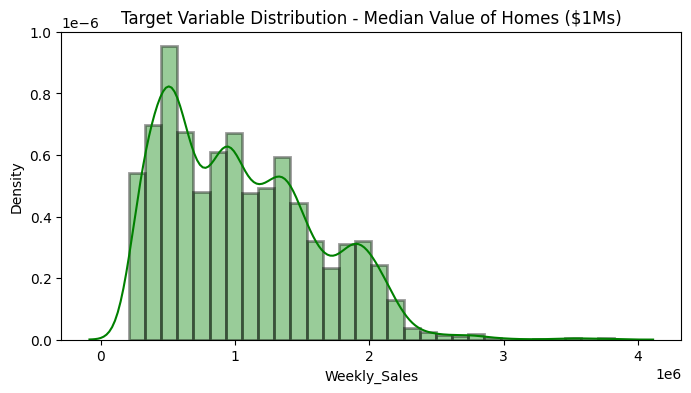

In [54]:
#Let us first analyze the distribution of the target variable
target = 'Weekly_Sales'
plt.figure(figsize=[8,4])
sns.distplot(data[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

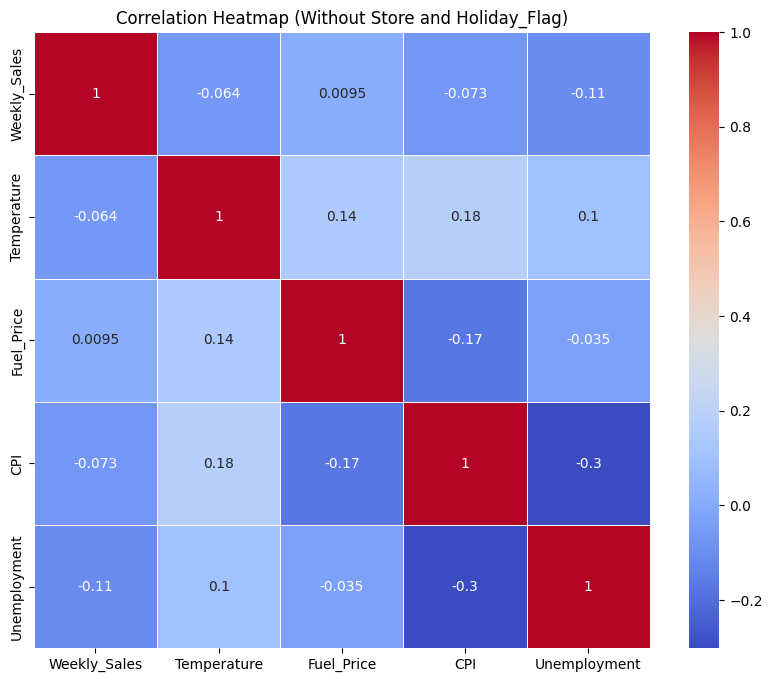

In [35]:
# playing around with the data to see whether there is any strong correlation (plotting).
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Exclude the 'Store' and 'Holiday_Flag' columns from the correlation matrix
correlation_matrix = correlation_matrix.drop(['Store', 'Holiday_Flag','month','year','Week'], axis=0)
correlation_matrix = correlation_matrix.drop(['Store', 'Holiday_Flag','month','year','Week'], axis=1)

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Heatmap (Without Store and Holiday_Flag)')
plt.show()
